# eval_bml

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from spotRiver.evaluation.eval_bml import eval_bml_horizon, eval_bml_landmark, eval_bml_window, eval_oml_horizon

model = LinearRegression()

X_train = list(range(10))
y_train = [2*x for x in X_train]

X_test = list(range(10, 20))
y_test = [x for x in X_test]

train = pd.DataFrame(X_train, columns=["x1"])
train["y"] = y_train

test = pd.DataFrame(X_test, columns=["x1"])
test["y"] = y_test

target_column = "y"
horizon = 1
df_eval , df_true = eval_bml_horizon(model , train , test , target_column, horizon)
print (df_eval )
print (df_true )

# eval_bml_landmark

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from spotRiver.evaluation.eval_bml import eval_bml_landmark

model = LinearRegression()

X_train = list(range(10))
y_train = [2*x for x in X_train]

X_test = list(range(10, 20))
y_test = [x for x in X_test]

train = pd.DataFrame(X_train, columns=["x1"])
train["y"] = y_train

test = pd.DataFrame(X_test, columns=["x1"])
test["y"] = y_test

target_column = "y"
horizon = 1
df_eval , df_true = eval_bml_landmark(model , train , test , target_column, horizon)
print (df_eval )
print (df_true )

# eval_bml_window

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from spotRiver.evaluation.eval_bml import eval_bml_window

model = LinearRegression()

X_train = list(range(10))
y_train = [2*x for x in X_train]

X_test = list(range(10, 20))
y_test = [x for x in X_test]

train = pd.DataFrame(X_train, columns=["x1"])
train["y"] = y_train

test = pd.DataFrame(X_test, columns=["x1"])
test["y"] = y_test

target_column = "y"
horizon = 1
df_eval , df_true = eval_bml_window(model , train , test , target_column, horizon)
print (df_eval )
print (df_true )

# eval_oml_horizon

In [ ]:
import pandas as pd
import numpy as np
from river import linear_model
from river import preprocessing,datasets
model = preprocessing.StandardScaler() | linear_model.LinearRegression()
X_train = list(range(10))
y_train = [2*x for x in X_train]
X_test = list(range(10, 20))
y_test = [x for x in X_test]
train = pd.DataFrame(X_train, columns=["x1"])
train["y"] = y_train
test = pd.DataFrame(X_test, columns=["x1"])
test["y"] = y_test
target_column = "y"
horizon = 1
df_eval, df_preds = eval_oml_horizon(model, train, test, target_column, horizon)
print(df_eval)
print(df_preds)

In [ ]:
from river import linear_model, datasets, preprocessing
from spotRiver.evaluation.eval_bml import eval_oml_horizon
from spotRiver.utils.data_conversion import convert_to_df
model = preprocessing.StandardScaler() | linear_model.LinearRegression()
dataset = datasets.TrumpApproval()
target_column = "Approve"
df = convert_to_df(dataset, target_column)
train = df[:500]
test = df[500:]
horizon = 1
df_eval, df_preds = eval_oml_horizon(model, train, test, target_column, horizon)

In [ ]:
from spotRiver.evaluation.eval_bml import plot_bml_oml_horizon_metrics, plot_bml_oml_horizon_predictions
plot_bml_oml_horizon_metrics(df_eval)
plot_bml_oml_horizon_predictions(df_preds, target_column=target_column)

In [ ]:
df_eval

# eval_oml_iter_progressive

In [ ]:
from river import datasets
from spotRiver.evaluation.eval_oml import eval_oml_iter_progressive, plot_oml_iter_progressive
from river import metrics as river_metrics
from river import tree as river_tree
from river import preprocessing as river_preprocessing
dataset = datasets.TrumpApproval()

In [ ]:
model =  (river_preprocessing.StandardScaler() | river_tree.HoeffdingAdaptiveTreeRegressor(seed=1))

res_num = eval_oml_iter_progressive(
    dataset = list(dataset),
    step = 1,
    metric = river_metrics.MAE(),
    models =
    {
        "HATR": model,
    }
)

In [ ]:
plot_oml_iter_progressive(res_num)

In [ ]:
import numpy as np
np.arange(100) // 7

In [ ]:
np.arange(100) % 7

In [ ]:
100 % 3

In [ ]:
arr = np.arange(100) // 7
# Remove the last two entries
rem = 100 % 7
arr = arr[:-rem]

In [ ]:
arr

In [ ]:
import pandas as pd
import numpy as np
from river import linear_model, datasets
from river import preprocessing
from spotRiver.evaluation.eval_bml import eval_oml_horizon
from spotRiver.utils.data_conversion import convert_to_df
dataset = datasets.TrumpApproval()
target_column = "Approval"
df = convert_to_df(dataset, target_column)
train = df[:500]
test = df[500:]
model = preprocessing.StandardScaler() | linear_model.LinearRegression()

horizon = 10
oml_grace_period = 10
df_eval, df_preds = eval_oml_horizon(model, train, test, target_column, horizon, oml_grace_period)
df_eval.head()

In [ ]:
# take the mean of the MAEs of the predicted values and ignore the NaN values
df_eval = df_eval.dropna()
y = df_eval["MAE"].mean()
y

In [ ]:
df_preds.head()

In [ ]:
1_000_000 / (7*24)

In [ ]:
250000/(7*24)

## Evaluate Model

In [1]:
import numpy as np
def evaluate_model(y_true: np.ndarray, y_pred: np.ndarray, memory: float, r_time: float, metric) -> dict:
    """
    Evaluate a model's performance based on its predictions and ground truth values.

    Parameters
    ----------
    y_true: Ground truth values as a numpy array.
    y_pred: Predicted values as a numpy array.
    memory: Memory usage in MB.
    r_time: Computation time in seconds.
    metric: A function that takes in two arguments (y_true and y_pred) and returns a score.

    Returns
    -------
    A dictionary containing the evaluation results including the metric score, memory usage and computation time.

    Example
    ------
    from sklearn.metrics import mean_squared_error
        import numpy as np
        y_true = np.array([1.0, 2.0, 3.0])
        y_pred = np.array([1.1, 2.1, 2.9])
        memory = 100
        r_time = 0.5
        result = evaluate_model(y_true=y_true,
                                y_pred=y_pred,
                                memory=memory,
                                r_time=r_time,
                                metric=mean_squared_error)
        print(result)

        # Output:
        # {'Metric': 0.00666666666666671, 'Memory (MB)': 100, 'CompTime (s)': 0.5}
    """
    if len(y_true) != len(y_pred):
        raise ValueError("y_true and y_pred must have the same size")
    if (len(y_true) == 0) or (len(y_pred) == 0):
        res_dict = {
            "Metric": None,
            "Memory (MB)": memory,
            "CompTime (s)": r_time,
        }
        return res_dict
    score = metric(y_true, y_pred)
    res_dict = {"Metric": score, "Memory (MB)": memory, "CompTime (s)": r_time}
    return res_dict

In [2]:
from sklearn.metrics import mean_squared_error
import numpy as np
y_true = np.array([1.0, 2.0, 3.0])
y_pred = np.array([1.1, 2.1, 2.9])
memory = 100
r_time = 0.5
result = evaluate_model(y_true=y_true,
                        y_pred=y_pred,
                        memory=memory,
                        r_time=r_time,
                        metric=mean_squared_error)
print(result)

{'Metric': 0.010000000000000018, 'Memory (MB)': 100, 'CompTime (s)': 0.5}


## expect a ValueError:

In [3]:
def test_evaluate_model():
    y_true = np.array([1.0, 2.0])
    y_pred = np.array([1.1, 2.1, 2.9])
    memory = 100
    r_time = 0.5

    try:
        result = evaluate_model(y_true=y_true,
                                y_pred=y_pred,
                                memory=memory,
                                r_time=r_time,
                                metric=mean_squared_error)
    except ValueError as e:
        assert str(e) == "y_true and y_pred must have the same size"

test_evaluate_model()

# Class ResourceMonitor

In [4]:
from typing import Optional
import tracemalloc
import time
from dataclasses import dataclass
class ResourceMonitorError(Exception):
    pass

@dataclass
class ResourceUsage:
    name: Optional[str]  # Description of Usage
    r_time: float  # Measured in seconds
    memory: float  # Measured in bytes

    def __str__(self):
        if self.name is None:
            res = [f"Resource usage for {self.name}:"]
        else:
            res = ["Resource usage:"]
        res.append(f"  Time [s]: {self.r_time}")
        res.append(f"  Memory [b]: {self.memory}")
        return "\n".join(res)

    def __repr__(self):
        return str(self)

class ResourceMonitor:
    def __init__(self, name: Optional[str] = None):
        self.name = name
        self.r_time = None
        self.memory = None
        self.current_memory = None
        self.peak_memory = None
        self._start = None

    def __enter__(self):
        if tracemalloc.is_tracing():
            raise ResourceMonitorError("Already tracing memory usage!")
        tracemalloc.start()
        tracemalloc.reset_peak()
        self._start = time.perf_counter_ns()

    def __exit__(self, type, value, traceback):
        self.r_time = (time.perf_counter_ns() - self._start) / 1.0e9
        _, peak = tracemalloc.get_traced_memory()
        self.memory = peak / (1024 * 1024)
        tracemalloc.stop()

    def result(self):
        if self.r_time is None or self.memory is None:
            raise ResourceMonitorError("No resources monitored yet.")
        return ResourceUsage(name=self.name, r_time=self.r_time, memory=self.memory)

In [5]:
rm = ResourceMonitor()
with rm:
    x = 10 ** 6
print(rm.result())
# Output:
# Resource usage for None:
#   Time [s]: 2.917e-06
#   Memory [b]: 8.7738037109375e-05

Resource usage for None:
  Time [s]: 3.208e-06
  Memory [b]: 8.7738037109375e-05


# Eval_bml Horizon Default

In [6]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error

def eval_bml_horizon_default(
    model: object,
    train: pd.DataFrame,
    test: pd.DataFrame,
    target_column: str,
    horizon: int,
    include_remainder: bool = True,
    metric: object = None,
) -> tuple:
    train = train.reset_index(drop=True)
    test = test.reset_index(drop=True)
    series_preds = pd.Series(dtype=float)
    series_diffs = pd.Series(dtype=float)
    rm = ResourceMonitor()
    with rm:
        model.fit(train.loc[:, train.columns != target_column], train[target_column])
    df_eval = pd.DataFrame.from_dict(
        [evaluate_model(y_true=np.array([]), y_pred=np.array([]), memory=rm.memory, r_time=rm.r_time, metric=metric)]
    )
    if include_remainder is False:
        rem = len(test) % horizon
        if rem > 0:
            test = test[:-rem]
    for batch_number, batch_df in test.groupby(np.arange(len(test)) // horizon):
        rm = ResourceMonitor()
        with rm:
            preds = pd.Series(model.predict(batch_df.loc[:, batch_df.columns != target_column]))
        diffs = batch_df[target_column].values - preds
        df_eval.loc[batch_number + 1] = pd.Series(
            evaluate_model(
                y_true=batch_df[target_column],
                y_pred=preds,
                memory=rm.memory,
                r_time=rm.r_time,
                metric=metric,
            )
        )
        series_preds = pd.concat([series_preds, preds], ignore_index=True)
        series_diffs = pd.concat([series_diffs, diffs], ignore_index=True)
    df_true = pd.DataFrame(test[target_column])
    df_true["Prediction"] = series_preds
    df_true["Difference"] = series_diffs
    return df_eval, df_true

# Eval BML New:

In [7]:
def eval_bml_horizon(
    model: object,
    train: pd.DataFrame,
    test: pd.DataFrame,
    target_column: str,
    horizon: int,
    include_remainder: bool = True,
    metric: object = None,
) -> tuple:
    # Reset index of train and test dataframes
    train = train.reset_index(drop=True)
    test = test.reset_index(drop=True)
    # Initialize lists for predictions and differences
    preds_list = []
    diffs_list = []
    # Fit the model on the training data
    rm = ResourceMonitor()
    with rm:
        model.fit(train.loc[:, train.columns != target_column], train[target_column])
    # Evaluate the model on empty arrays to get initial resource usage
    df_eval = pd.DataFrame.from_dict(
        [evaluate_model(y_true=np.array([]), y_pred=np.array([]), memory=rm.memory, r_time=rm.r_time, metric=metric)]
    )
    # If include_remainder is False, remove remainder rows from test dataframe
    if include_remainder is False:
        remainder = len(test) % horizon
        if remainder > 0:
            test = test[:-remainder]
    # Evaluate the model on batches of size horizon from the test dataframe
    for batch_number, batch_df in test.groupby(np.arange(len(test)) // horizon):
        rm = ResourceMonitor()
        with rm:
            preds = model.predict(batch_df.loc[:, batch_df.columns != target_column])
        diffs = batch_df[target_column].values - preds
        df_eval.loc[batch_number + 1] = pd.Series(
            evaluate_model(
                y_true=batch_df[target_column],
                y_pred=preds,
                memory=rm.memory,
                r_time=rm.r_time,
                metric=metric,
            )
        )
        # Append predictions and differences to their respective lists
        preds_list.append(preds)
        diffs_list.append(diffs)

    # Concatenate predictions and differences lists into series
    series_preds = pd.Series(np.concatenate(preds_list))
    series_diffs = pd.Series(np.concatenate(diffs_list))

    # Create a dataframe with true values and add columns for predictions and differences
    df_true = pd.DataFrame(test[target_column])
    df_true["Prediction"] = series_preds
    df_true["Difference"] = series_diffs
    return df_eval, df_true

# Example Regresssion

In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

model = LinearRegression()

# Create synthetic data for regression with 100 observations, 3 features and one target value
X_train, y_train = make_regression(n_samples=80, n_features=3, n_targets=1)
X_test, y_test = make_regression(n_samples=20, n_features=3, n_targets=1)

# Convert the data into a pandas data frame
train = pd.DataFrame(X_train, columns=["x1", "x2", "x3"])
train["y"] = y_train

test = pd.DataFrame(X_test, columns=["x1", "x2", "x3"])
test["y"] = y_test

target_column = "y"
horizon = 2
include_remainder = False
metric = mean_absolute_error
df_eval, df_true = eval_bml_horizon(model , train , test , target_column, horizon, include_remainder = include_remainder , metric=metric)
print (df_eval )
print (df_true )

        Metric  Memory (MB)  CompTime (s)
0          NaN     0.144329      0.002664
1    67.833646     0.011371      0.001095
2    17.643432     0.006816      0.001251
3    54.490855     0.006317      0.001019
4    38.651225     0.006264      0.000963
5    59.316989     0.006264      0.000951
6    11.565353     0.006264      0.000962
7    31.127835     0.006264      0.000968
8   125.788493     0.006264      0.001185
9    89.405219     0.006264      0.000918
10  142.924475     0.006264      0.001077
             y  Prediction  Difference
0  -177.011035  -66.859110 -110.151925
1    79.563101   54.047733   25.515368
2   -36.407803  -66.204099   29.796296
3     1.166323   -4.324244    5.490567
4   153.448444   45.916461  107.531982
5     7.578101    6.128372    1.449729
6     2.558450    2.213423    0.345027
7   145.309552   68.352128   76.957424
8   141.650222   59.168833   82.481389
9    28.549833   -7.602755   36.152588
10   29.583155   44.801239  -15.218084
11   -9.096112   -1.183490  

# Example Classification

In [9]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

model = LogisticRegression()

# Create synthetic data for classification with 10 observations and one target value
X_train, y_train = make_classification(n_samples=10, n_features=2, n_informative=2,
                           n_redundant=0, n_classes=2, random_state=0)
X_test, y_test = make_classification(n_samples=10, n_features=2, n_informative=2,
                           n_redundant=0, n_classes=2, random_state=2)

# Convert the data into a pandas data frame
train = pd.DataFrame(X_train, columns=['Feature 1', 'Feature 2'])
train['y'] = y_train
test = pd.DataFrame(X_test, columns=['Feature 1', 'Feature 2'])
test['y'] = y_test

target_column = "y"
horizon = 2
include_remainder = False
metric = accuracy_score
df_eval, df_true = eval_bml_horizon(model , train , test , target_column, horizon, include_remainder = include_remainder , metric=metric)
print (df_eval )
print (df_true )

   Metric  Memory (MB)  CompTime (s)
0     NaN     0.099700      0.004510
1     1.0     0.009333      0.001331
2     1.0     0.006477      0.001147
3     1.0     0.006317      0.001109
4     1.0     0.006317      0.001129
5     0.5     0.006317      0.001132
   y  Prediction  Difference
0  1           1           0
1  1           1           0
2  0           0           0
3  0           0           0
4  0           0           0
5  1           1           0
6  0           0           0
7  1           1           0
8  1           0           1
9  0           0           0


## 2nd example classification

In [10]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Generate synthetic data for classification
X_train, y_train = make_classification(n_samples=1000)
X_test, y_test = make_classification(n_samples=1000)

# Convert to DataFrames and add target column
train_df = pd.DataFrame(X_train)
train_df['target'] = y_train

test_df = pd.DataFrame(X_test)
test_df['target'] = y_test

# Initialize Decision Tree Classifier and evaluate using eval_bml_horizon function
dtc = DecisionTreeClassifier()
eval_results_df, true_preds_diffs_df = eval_bml_horizon(dtc, train_df,test_df,'target', 10, True, accuracy_score)

# Print first 5 rows of evaluation results DataFrame
print(eval_results_df.head())

# Print first 5 rows of true values/predictions/differences DataFrame
print(true_preds_diffs_df.head())

   Metric  Memory (MB)  CompTime (s)
0     NaN     0.301066      0.009391
1     0.3     0.012995      0.001281
2     0.3     0.009775      0.001222
3     0.6     0.009775      0.001265
4     0.2     0.009615      0.001199
   target  Prediction  Difference
0       1           1           0
1       0           0           0
2       1           0           1
3       0           1          -1
4       0           1          -1


# BML Landmark

In [11]:
from typing import Tuple, Generator
def gen_sliding_window(
    df: pd.DataFrame, horizon: int, include_remainder: bool = True
) -> Generator[pd.DataFrame, None, None]:
    i = 0
    while True:
        subset = df[i * horizon : (i + 1) * horizon]
        if len(subset) == 0:
            break
        elif len(subset) < horizon:
            if include_remainder:
                yield subset
            break
        i += 1
        yield subset

In [12]:
def eval_bml_landmark(
    model: object,
    train: pd.DataFrame,
    test: pd.DataFrame,
    target_column: str,
    horizon: int,
    include_remainder: bool = True,
    metric: object = None,
) -> tuple:
    train = train.reset_index(drop=True)
    test = test.reset_index(drop=True)
    series_preds = pd.Series(dtype=float)
    series_diffs = pd.Series(dtype=float)
    rm = ResourceMonitor()
    with rm:
        model.fit(train.loc[:, train.columns != target_column], train[target_column])
    df_eval = pd.DataFrame.from_dict(
        [evaluate_model(y_true=np.array([]), y_pred=np.array([]), memory=rm.memory, r_time=rm.r_time, metric=metric)]
    )
    if include_remainder is False:
        rem = len(test) % horizon
        if rem > 0:
            test = test[:-rem]
    # Landmark Evaluation
    for i, new_df in enumerate(gen_sliding_window(test, horizon)):
        train = pd.concat([train, new_df], ignore_index=True)
        rm = ResourceMonitor()
        with rm:
            preds = pd.Series(model.predict(new_df.loc[:, new_df.columns != target_column]))
            model.fit(train.loc[:, train.columns != target_column], train[target_column])

        diffs = new_df[target_column].values - preds
        df_eval.loc[i + 1] = pd.Series(
            evaluate_model(
                y_true=new_df[target_column],
                y_pred=preds,
                memory=rm.memory,
                r_time=rm.r_time,
                metric=metric,
            )
        )
        series_preds = pd.concat([series_preds, preds], ignore_index=True)
        series_diffs = pd.concat([series_diffs, diffs], ignore_index=True)
    df_true = pd.DataFrame(test[target_column])
    df_true["Prediction"] = series_preds
    df_true["Difference"] = series_diffs
    return df_eval, df_true

## Example Regression

In [13]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

model = LinearRegression()

# Create synthetic data for regression with 100 observations, 3 features and one target value
X_train, y_train = make_regression(n_samples=80, n_features=3, n_targets=1)
X_test, y_test = make_regression(n_samples=20, n_features=3, n_targets=1)

# Convert the data into a pandas data frame
train = pd.DataFrame(X_train, columns=["x1", "x2", "x3"])
train["y"] = y_train

test = pd.DataFrame(X_test, columns=["x1", "x2", "x3"])
test["y"] = y_test

target_column = "y"
horizon = 2
include_remainder = False
metric = mean_absolute_error
df_eval, df_true = eval_bml_landmark(model , train , test , target_column, horizon, include_remainder = include_remainder , metric=metric)
print (df_eval )
print (df_true )

        Metric  Memory (MB)  CompTime (s)
0          NaN     0.024075      0.002236
1    39.993083     0.025871      0.003163
2   121.643311     0.024796      0.003685
3    81.945331     0.023666      0.002872
4    50.497670     0.023865      0.002668
5    31.343907     0.024466      0.002947
6    29.558143     0.024261      0.002890
7    83.502909     0.024542      0.002718
8    78.947671     0.024601      0.003397
9    31.602816     0.024857      0.002791
10   85.219699     0.025493      0.003023
             y  Prediction  Difference
0   -34.446883  -48.018612   13.571729
1   146.715625   80.301189   66.414436
2  -148.093768 -282.462116  134.368348
3    38.311993  -70.606281  108.918273
4    57.342384   55.224307    2.118077
5  -149.422330   12.350255 -161.772585
6  -215.876720 -135.405397  -80.471323
7   -12.898963    7.625053  -20.524016
8    56.222409   -0.228907   56.451316
9   -91.124630  -84.888132   -6.236498
10  -37.499571    6.351450  -43.851021
11   70.771529   86.036793  

## Example Classification

In [14]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Generate synthetic data for classification
X_train, y_train = make_classification(n_samples=1000)
X_test, y_test = make_classification(n_samples=1000)

# Convert to DataFrames and add target column
train_df = pd.DataFrame(X_train)
train_df['target'] = y_train

test_df = pd.DataFrame(X_test)
test_df['target'] = y_test

# Initialize Decision Tree Classifier and evaluate using eval_bml_landmark function 
dtc = DecisionTreeClassifier()
eval_results_df, true_preds_diffs_df = eval_bml_landmark(dtc, train_df,test_df,'target', 100, True, accuracy_score)

# Print first 5 rows of evaluation results DataFrame 
print(eval_results_df.head())

# Print first 5 rows of true values/predictions/differences DataFrame 
print(true_preds_diffs_df.head())

   Metric  Memory (MB)  CompTime (s)
0     NaN     0.295241      0.011506
1    0.54     0.325284      0.015666
2    0.70     0.352242      0.018753
3    0.79     0.379490      0.019190
4    0.83     0.408167      0.017358
   target  Prediction  Difference
0       0           0           0
1       0           0           0
2       1           1           0
3       0           1          -1
4       0           0           0


# Eval BML Window

In [15]:
def gen_horizon_shifted_window(df, window_size, horizon):
    i = 0
    while True:
        train_window = df[i * horizon : i * horizon + window_size]
        test_window = df[i * horizon + window_size : (i + 1) * horizon + window_size]
        if len(test_window) == 0:
            break
        elif len(test_window) < horizon:
            yield train_window, test_window
            break
        i += 1
        yield train_window, test_window

In [16]:
def eval_bml_window(
    model: object,
    train: pd.DataFrame,
    test: pd.DataFrame,
    target_column: str,
    horizon: int,
    include_remainder: bool = True,
    metric: object = None,
) -> tuple:
    train = train.reset_index(drop=True)
    test = test.reset_index(drop=True)
    df_all = pd.concat([train, test], ignore_index=True)
    series_preds = pd.Series(dtype=float)
    series_diffs = pd.Series(dtype=float)
    rm = ResourceMonitor()
    with rm:
        model.fit(train.loc[:, train.columns != target_column], train[target_column])
    df_eval = pd.DataFrame.from_dict(
        [evaluate_model(y_true=np.array([]), y_pred=np.array([]), memory=rm.memory, r_time=rm.r_time, metric=metric)]
    )
    if include_remainder is False:
        rem = len(test) % horizon
        if rem > 0:
            test = test[:-rem]
    for i, (w_train, w_test) in enumerate(gen_horizon_shifted_window(df_all, len(train), horizon)):
        rm = ResourceMonitor()
        with rm:
            model.fit(w_train.loc[:, w_train.columns != target_column], w_train[target_column])
            preds = pd.Series(model.predict(w_test.loc[:, w_test.columns != target_column]))

        diffs = w_test[target_column].values - preds
        df_eval.loc[i + 1] = pd.Series(
            evaluate_model(
                y_true=w_test[target_column],
                y_pred=preds,
                memory=rm.memory,
                r_time=rm.r_time,
                metric=metric,
            )
        )

        series_preds = pd.concat([series_preds, preds], ignore_index=True)
        series_diffs = pd.concat([series_diffs, diffs], ignore_index=True)

    df_true = pd.DataFrame(test[target_column])
    df_true["Prediction"] = series_preds
    df_true["Difference"] = series_diffs
    return df_eval, df_true

## Example Regression

In [17]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.metrics import mean_absolute_error

model = LinearRegression()

# Create synthetic data for regression with 100 observations, 3 features and one target value
X_train, y_train = make_regression(n_samples=80, n_features=3, n_targets=1)
X_test, y_test = make_regression(n_samples=20, n_features=3, n_targets=1)

# Convert the data into a pandas data frame
train = pd.DataFrame(X_train, columns=["x1", "x2", "x3"])
train["y"] = y_train

test = pd.DataFrame(X_test, columns=["x1", "x2", "x3"])
test["y"] = y_test

target_column = "y"
horizon = 2
include_remainder = False
metric = mean_absolute_error
df_eval, df_true = eval_bml_window(model , train , test , target_column, horizon, include_remainder = include_remainder , metric=metric)
print (df_eval )
print (df_true )

        Metric  Memory (MB)  CompTime (s)
0          NaN     0.023727      0.002267
1    27.487904     0.023926      0.002932
2    64.991036     0.021680      0.002741
3    33.764241     0.021202      0.002718
4    59.779323     0.021202      0.003144
5    12.815860     0.021202      0.002684
6   103.578350     0.021202      0.002823
7    35.717621     0.021152      0.003035
8   111.018473     0.021202      0.002985
9   104.543203     0.021202      0.003330
10   22.880664     0.021152      0.002783
            y  Prediction  Difference
0    6.792881  -27.721229   34.514110
1   -5.322655  -25.784352   20.461697
2   -3.421629 -121.248688  117.827059
3    0.745922   12.900934  -12.155012
4   -2.247334  -64.768890   62.521556
5    2.702723    7.709648   -5.006925
6    0.832418  -24.768982   25.601400
7    4.102846   98.060092  -93.957245
8   -5.223584   -9.396409    4.172825
9   -1.497920   19.960975  -21.458894
10  -8.454964 -131.667629  123.212666
11   7.142640  -76.801394   83.944035
12

## Example Classification

In [18]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Generate synthetic data for classification
X_train, y_train = make_classification(n_samples=1000)
X_test, y_test = make_classification(n_samples=1000)

# Convert to DataFrames and add target column
train_df = pd.DataFrame(X_train)
train_df['target'] = y_train

test_df = pd.DataFrame(X_test)
test_df['target'] = y_test

# Initialize Decision Tree Classifier and evaluate using eval_bml_landmark function 
dtc = DecisionTreeClassifier()
eval_results_df, true_preds_diffs_df = eval_bml_window(dtc, train_df,test_df,'target', 100, True, accuracy_score)

# Print first 5 rows of evaluation results DataFrame 
print(eval_results_df.head())

# Print first 5 rows of true values/predictions/differences DataFrame 
print(true_preds_diffs_df.head())

   Metric  Memory (MB)  CompTime (s)
0     NaN     0.294700      0.009129
1    0.55     0.294894      0.010389
2    0.69     0.292476      0.011158
3    0.77     0.291972      0.011152
4    0.82     0.291972      0.011109
   target  Prediction  Difference
0       0           1          -1
1       1           0           1
2       1           1           0
3       1           0           1
4       1           0           1


# Eval OML Horizon

In [19]:
from river import stream as river_stream
def eval_oml_horizon(
    model: object,
    train: pd.DataFrame,
    test: pd.DataFrame,
    target_column: str,
    horizon: int,
    include_remainder: bool = True,
    metric: object = None,
    oml_grace_period: int = None,
) -> Tuple[pd.DataFrame, pd.DataFrame]:
    # Check if metric is None or null and raise ValueError if it is
    if metric is None:
        raise ValueError("The 'metric' parameter must not be None or null.")
    if oml_grace_period is None:
        oml_grace_period = horizon
    train = train.reset_index(drop=True)
    test = test.reset_index(drop=True)
    if include_remainder is False:
        rem = len(test) % horizon
        if rem > 0:
            test = test[:-rem]
    series_preds = pd.Series(dtype=float)
    series_diffs = pd.Series(dtype=float)

    # Initial Training on Train Data
    # For OML, this is performed on a limited subset only (oml_grace_period).
    train_X = train.loc[:, train.columns != target_column]
    train_y = train[target_column]
    train_X = train_X.tail(oml_grace_period)
    train_y = train_y.tail(oml_grace_period)
    rm = ResourceMonitor()
    with rm:
        for xi, yi in river_stream.iter_pandas(train_X, train_y):
            # The following line returns y_pred, which is not used, therefore set to "_":
            _ = model.predict_one(xi)
            # metric = metric.update(yi, y_pred)
            model = model.learn_one(xi, yi)
    df_eval = pd.DataFrame.from_dict(
        [evaluate_model(y_true=np.array([]), y_pred=np.array([]), memory=rm.memory, r_time=rm.r_time, metric=metric)]
    )

    # Test Data Evaluation
    for i, new_df in enumerate(gen_sliding_window(test, horizon)):
        preds = []
        test_X = new_df.loc[:, new_df.columns != target_column]
        test_y = new_df[target_column]
        rm = ResourceMonitor()
        with rm:
            for xi, yi in river_stream.iter_pandas(test_X, test_y):
                pred = model.predict_one(xi)
                preds.append(pred)  # This is falsly measured with the ResourceMonitor
                model = model.learn_one(xi, yi)
        preds = pd.Series(preds)
        diffs = new_df[target_column].values - preds
        df_eval.loc[i + 1] = pd.Series(
            evaluate_model(
                y_true=new_df[target_column],
                y_pred=preds,
                memory=rm.memory,
                r_time=rm.r_time,
                metric=metric,
            )
        )
        series_preds = pd.concat([series_preds, preds], ignore_index=True)
        series_diffs = pd.concat([series_diffs, diffs], ignore_index=True)
    df_true = pd.DataFrame(test[target_column])
    df_true["Prediction"] = series_preds
    df_true["Difference"] = series_diffs
    return df_eval, df_true

## Example Regression

In [20]:
import pandas as pd
import numpy as np
from river import linear_model, preprocessing, datasets
model = preprocessing.StandardScaler() | linear_model.LinearRegression()
from river import datasets
import pandas as pd
dataset = datasets.TrumpApproval()
data_dict = {key: [] for key in list(dataset)[0][0].keys()}
data_dict["Approval"] = []
for x in dataset:
    for key, value in x[0].items():
        data_dict[key].append(value)
    data_dict["Approval"].append(x[1])
df = pd.DataFrame(data_dict)
df.rename(columns={'date': 'ordinal_date', 'Gallup': 'gallup', 'Ipsos': 'ipsos', 'Morning Consult': 'morning_consult', 'Rasmussen': 'rasmussen', 'YouGov': 'you_gov'}, inplace=True)
train = df[0:499]
test = df[500:-1]
target_column = "Approval"
horizon = 10
oml_grace_period = 5
include_remainder = True
df_eval, df_preds = eval_oml_horizon(model=model,
                                     train=train,
                                     test=test,
                                     target_column=target_column,
                                     horizon=horizon,
                                     include_remainder=include_remainder,
                                     metric= mean_absolute_error,
                                     oml_grace_period=oml_grace_period)
df_eval.head(3)


,Metric,Memory (MB),CompTime (s)
0,NaN,0.027605,0.000670
1,19.265657,0.009155,0.000982
2,20.021012,0.008453,0.000940


In [21]:
df_preds.head(3)

,Approval,Prediction,Difference
0,42.03181,18.448644,23.583166
1,42.03181,20.532721,21.499089
2,42.12241,17.559021,24.563389


## Drift

In [22]:
horizon = 7*24
k = 0.1
n_total = int(k*100_000)
p_1 = int(k*25_000)
p_2 = int(k*50_000)
position=(p_1, p_2)
n_train = 1_000
a = n_train + p_1 - 12
b = a + 12

In [23]:
from river.datasets import synth
dataset = synth.FriedmanDrift(
   drift_type='gra',
   position=position,
     seed=123
)
data_dict = {key: [] for key in list(dataset.take(1))[0][0].keys()}
data_dict["y"] = []
for x, y in dataset.take(n_total):
    for key, value in x.items():
        data_dict[key].append(value)
    data_dict["y"].append(y)
df = pd.DataFrame(data_dict)
# Add column names x1 until x10 to the first 10 columns of the dataframe and the column name y to the last column
df.columns = [f"x{i}" for i in range(1, 11)] + ["y"]
train = df[:n_train]
test = df[n_train:]
target_column = "y"

In [24]:
oml_lm = preprocessing.StandardScaler()
oml_lm |= linear_model.LinearRegression()

df_eval_oml_lm, df_true_oml_lm = eval_oml_horizon(model=oml_lm, train=train, test=test, target_column="y", horizon=horizon, metric=mean_absolute_error, oml_grace_period=horizon)

In [26]:
df_eval_oml_lm.head(3)

,Metric,Memory (MB),CompTime (s)
0,NaN,0.015199,0.019163
1,2.148333,0.014881,0.018838
2,2.061236,0.014067,0.018572


In [27]:
df_true_oml_lm.head(3)

,y,Prediction,Difference
0,9.639799,7.719836,1.919963
1,11.859974,13.507064,-1.647090
2,11.761361,10.599318,1.162043


## Example Classification

In [34]:
from river.datasets import synth
dataset = synth.SEA(variant=0, seed=42)
data_dict = {key: [] for key in list(dataset.take(1))[0][0].keys()}
data_dict["y"] = []
for x, y in dataset.take(n_total):
    for key, value in x.items():
        data_dict[key].append(value)
    data_dict["y"].append(y)
df = pd.DataFrame(data_dict)
# Add column names x1 until x10 to the first 10 columns of the dataframe and the column name y to the last column
df.columns = [f"x{i}" for i in range(1, 4)] + ["y"]
df = df.apply(lambda x: x.astype(int) if x.dtype == bool else x)
train = df[:n_train]
test = df[n_train:]
target_column = "y"

In [35]:
train.head(3)

,x1,x2,x3,y
0,6.394268,0.250108,2.750293,0
1,2.232107,7.364712,6.766995,1
2,8.921796,0.869388,4.219218,1


In [36]:
test.head(3)

,x1,x2,x3,y
1000,8.640507,6.509696,6.871604,1
1001,1.626565,0.737094,8.457625,0
1002,2.949086,3.187169,9.516621,0


In [37]:
oml_lm = preprocessing.StandardScaler()
oml_lm |= linear_model.LogisticRegression()

df_eval_oml_lm, df_true_oml_lm = eval_oml_horizon(model=oml_lm, train=train, test=test, target_column="y", horizon=horizon, metric=accuracy_score, oml_grace_period=horizon)

In [38]:
df_eval_oml_lm.head(3)

,Metric,Memory (MB),CompTime (s)
0,NaN,0.014008,0.010726
1,0.964286,0.011119,0.009905
2,0.988095,0.008796,0.010258


# Plots

In [50]:
import copy
import matplotlib.pyplot as plt
def plot_bml_oml_horizon_metrics(
    df_eval: list[pd.DataFrame] = None,
    df_labels: list = None,
    log_x=False,
    log_y=False,
    cumulative=True,
    grid=True,
    fig_width=16,
    fig_height=5,
    metric=None,
    **kwargs,
) -> None:
    # Check if input dataframes are provided
    if df_eval is not None:
        df_list = copy.deepcopy(df_eval)
        # Convert single dataframe input to a list if needed
        if df_list.__class__ != list:
            df_list = [df_list]
        # Define metric names and titles
        metric_name = metric.__class__.__name__
        metrics = ["Metric", "CompTime (s)", "Memory (MB)"]
        titles = [metric_name, "Computation time (s)", "Memory (MB)"]
        # Create subplots with shared x-axis
        fig, axes = plt.subplots(3, figsize=(fig_width, fig_height), constrained_layout=True, sharex=True)
        # Loop over each dataframe in input list
        for j, df in enumerate(df_list):
            if cumulative:
                # df.MAE = np.cumsum(df.MAE) / range(1, (1 + df.MAE.size))
                df["Metric"] = np.cumsum(df["Metric"]) / range(1, (1 + df["Metric"].size))
                df["CompTime (s)"] = np.cumsum(df["CompTime (s)"])  # / range(1, (1 + df["CompTime (s)"].size))
                # df["Memory (MB)"] = np.cumsum(df["Memory (MB)"]) / range(1, (1 + df["Memory (MB)"].size))
            # Loop over each metric
            for i in range(3):
                # Assign label based on input or default value
                if df_labels is None:
                    label = f"{j}"
                else:
                    label = df_labels[j]
                # Plot metric values against dataset names
                axes[i].plot(df.index.values.tolist(), df[metrics[i]].values.tolist(), label=label, **kwargs)
                # Set title and legend
                axes[i].set_title(titles[i])
                axes[i].legend(loc="upper right")
                axes[i].grid(grid)
                # Set logarithmic scales if specified
                if log_x:
                    axes[i].set_xscale("log")
                if log_y:
                    axes[i].set_yscale("log")


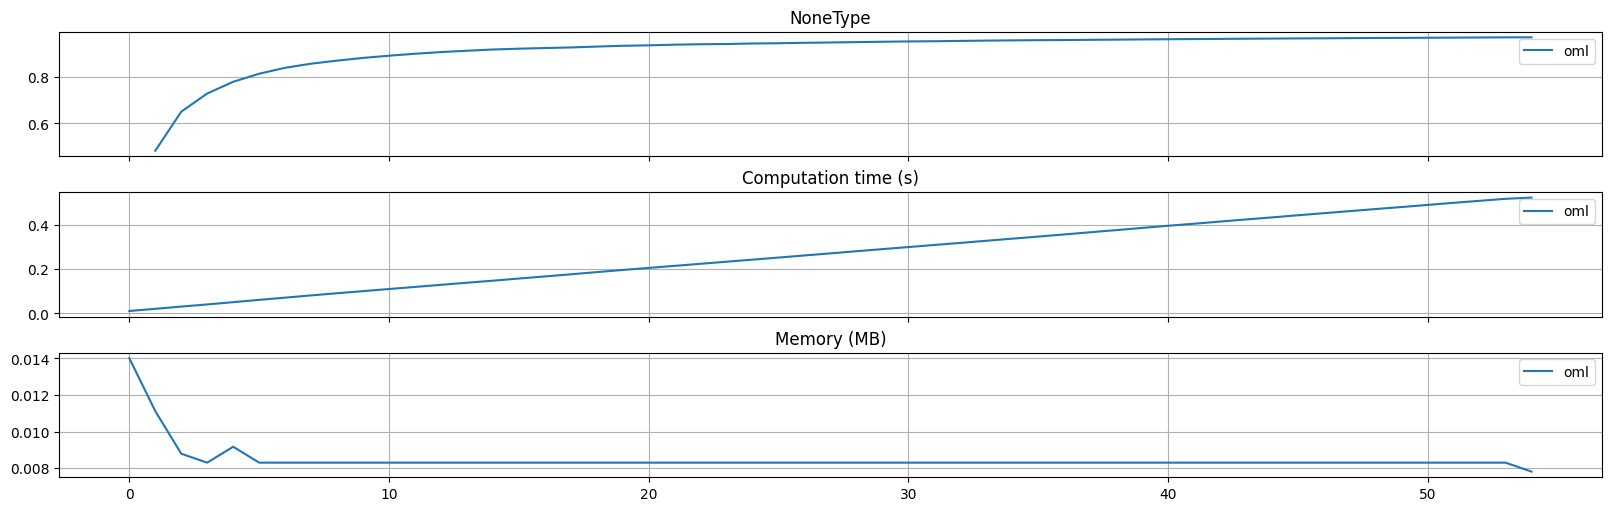

In [51]:
df_labels=["oml"]
plot_bml_oml_horizon_metrics(df_eval = [df_eval_oml_lm], df_labels=df_labels, cumulative=True)

In [59]:
df_true_oml_lm = df_true_oml_lm.apply(lambda x: x.astype(int) if x.dtype == bool else x)
df_true_oml_lm.head(3)

,y,Prediction,Difference
0,1,1,0
1,0,0,0
2,0,0,0


In [60]:
def plot_bml_oml_horizon_predictions(
df_true: list[pd.DataFrame] = None,
df_labels: list = None,
target_column: str = "Actual",
log_x=False,
log_y=False,
skip_first_n=0,
grid=True,
fig_width=16,
fig_height=5,
**kwargs,
) -> None:
    if df_true is not None:
        df_plot = copy.deepcopy(df_true)
    if df_plot.__class__ != list:
        df_plot = [df_plot]
    # plot actual vs predicted values
    plt.figure(figsize=(fig_width, fig_height))
    for j, df in enumerate(df_plot):
        # Assign label based on input or default value
        if df_labels is None:
            label = f"{j}"
        else:
            label = df_labels[j]
        # skip first n values
        df["Prediction"][range(skip_first_n)] = np.nan
        plt.plot(df.index, df["Prediction"], label=label, **kwargs)
    # Plot the actual value only once:
    plt.plot(df_plot[0].index, df_plot[0][target_column], label="Actual", **kwargs)
    plt.title("Actual vs Prediction")
    if log_x:
        plt.xscale("log")
    if log_y:
        plt.yscale("log")
    plt.grid(grid)
    plt.legend()
plt.show()


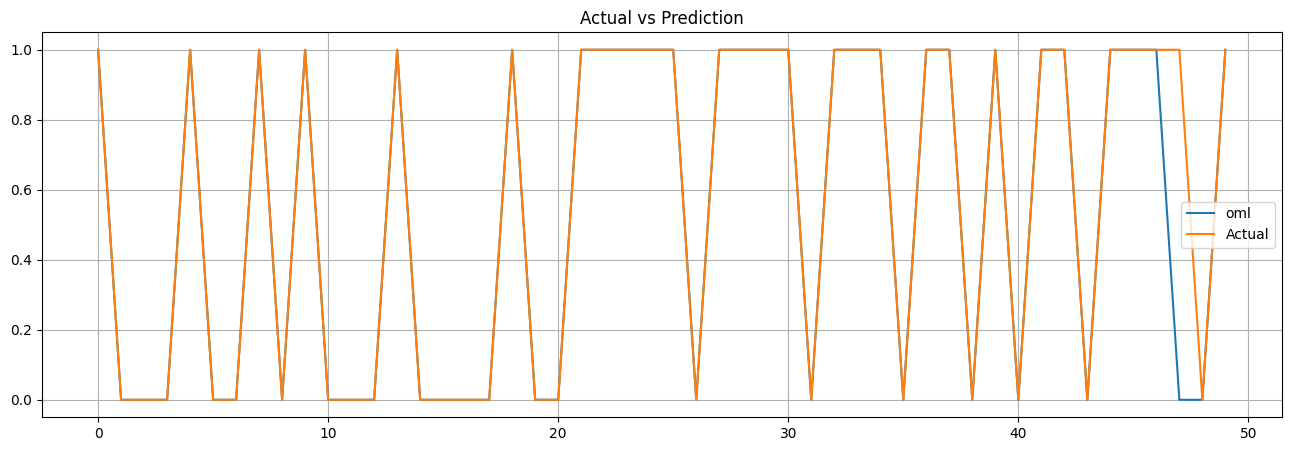

In [64]:
plot_bml_oml_horizon_predictions(df_true = [df_true_oml_lm[0:50]], target_column=target_column,  df_labels=df_labels)